In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import os
import seaborn as sns

In [3]:
import nltk
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
import csv

In [20]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os

import string
import numpy as np

In [4]:

genres = ['action', 'crime', 'adventure', 'thriller', 'family', 'mystery', 'scifi', 'history', 'sports', 'animation', 'war', 'biography', 'horror', 'fantasy', 'romance', 'film-noir']

dfs = []

for genre in genres:
    df = pd.read_csv(f'/Users/gozi/Desktop/text mining/Project/{genre}.csv')
    df['Genre'] = genre.capitalize()  
    dfs.append(df)

movies_df = pd.concat(dfs, ignore_index=True)


In [11]:
movies_df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),Genre
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN,Action
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN,Action
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN,Action
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN,Action
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368295,tt0032257,Black Diamonds,1940,NaN,60 min,"Crime, Drama, Film-Noir",5.5,A reporter on a visit to his hometown hears of...,Christy Cabanne,/name/nm0127511/,"Richard Arlen, \nAndy Devine, \nKathryn Adams,...","/name/nm0035159/,/name/nm0222596/,/name/nm0011...",33.0,NaN,Film-noir
368296,tt0027668,The Gentleman from Louisiana,1936,NaN,67 min,"Crime, Drama, Film-Noir",4.5,"In Victorian-era USA, a horse-jockey becomes a...",Irving Pichel,/name/nm0681635/,"Eddie Quillan, \nCharles 'Chic' Sale, \nCharlo...","/name/nm0703600/,/name/nm0757925/,/name/nm0377...",21.0,NaN,Film-noir
368297,tt0047929,El cerco,1955,NaN,77 min,"Crime, Film-Noir",6.2,A group of robbers assault a factory in the po...,Miguel Iglesias,/name/nm0407071/,"José Guardiola, \nIsabel de Castro, \nÁngel Jo...","/name/nm0345348/,/name/nm0207894/,/name/nm0430...",46.0,NaN,Film-noir
368298,tt0033161,Three Silent Men,1940,NaN,72 min,"Crime, Drama, Film-Noir",5.0,Foreign scientist is selling a secret weapon t...,Thomas Bentley,/name/nm0072872/,"Sebastian Shaw, \nDerrick De Marney, \nPatrici...","/name/nm0789970/,/name/nm0210116/,/name/nm0733...",79.0,NaN,Film-noir


In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368300 entries, 0 to 368299
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movie_id     368300 non-null  object 
 1   movie_name   368300 non-null  object 
 2   year         315052 non-null  object 
 3   certificate  104191 non-null  object 
 4   runtime      259146 non-null  object 
 5   genre        368300 non-null  object 
 6   rating       230938 non-null  float64
 7   description  368300 non-null  object 
 8   director     340931 non-null  object 
 9   director_id  340931 non-null  object 
 10  star         309605 non-null  object 
 11  star_id      316442 non-null  object 
 12  votes        230942 non-null  float64
 13  gross(in $)  25039 non-null   float64
 14  Genre        368300 non-null  object 
dtypes: float64(3), object(12)
memory usage: 42.1+ MB


In [9]:
movies_df.count()

movie_id       368300
movie_name     368300
year           315052
certificate    104191
runtime        259146
genre          368300
rating         230938
description    368300
director       340931
director_id    340931
star           309605
star_id        316442
votes          230942
gross(in $)     25039
Genre          368300
dtype: int64

In [10]:
movies_df.nunique()

movie_id       243197
movie_name     213858
year              225
certificate        44
runtime           365
genre            1749
rating             91
description    186842
director       103525
director_id     96502
star           197392
star_id        202488
votes           18648
gross(in $)     11541
Genre              16
dtype: int64

In [13]:
ids = movies_df["movie_name"]
movies_df[ids.isin(ids[ids.duplicated()])].sort_values("movie_name")


,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),Genre
293484,tt10985348,#1915House,2018,NaN,55 min,"Horror, Thriller",NaN,A century of secrets are hidden behind the fre...,Justin DiPego,/name/nm0228116/,Justin DiPego,/name/nm0228116/,NaN,NaN,Horror
161907,tt10985348,#1915House,2018,NaN,55 min,"Horror, Thriller",NaN,A century of secrets are hidden behind the fre...,Justin DiPego,/name/nm0228116/,Justin DiPego,/name/nm0228116/,NaN,NaN,Thriller
260452,tt3120962,#5,2013,NaN,68 min,"Biography, Comedy, Fantasy",5.9,#5 is a film about the creative process of mak...,Ricky Bardy,/name/nm5361948/,"Justin Bardy, \nRicky Bardy","/name/nm5876989/,/name/nm5361948/",13.0,NaN,Biography
309764,tt3120962,#5,2013,NaN,68 min,"Biography, Comedy, Fantasy",5.9,#5 is a film about the creative process of mak...,Ricky Bardy,/name/nm5361948/,"Justin Bardy, \nRicky Bardy","/name/nm5876989/,/name/nm5361948/",13.0,NaN,Fantasy
1053,tt10620868,#Alive,2020,TV-MA,98 min,"Action, Drama, Horror",6.3,The rapid spread of an unknown infection has l...,Il Cho,/name/nm4252203/,"Yoo Ah-in, \nPark Shin-Hye, \nJeon Bae-soo, \n...","/name/nm2584860/,/name/nm2339975/,/name/nm3482...",41750.0,NaN,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80950,tt0183955,Üç Tatli Bela,1979,NaN,69 min,"Action, Comedy, Crime",4.3,Add a Plot,Cüneyt Arkin,/name/nm0035067/,"Cüneyt Arkin, \nMeral Orhonsay, \nSüleyman Tur...","/name/nm0035067/,/name/nm0649803/,/name/nm0876...",38.0,NaN,Crime
157308,tt0365841,Þriðja nafni,2003,NaN,88 min,"Comedy, Drama, Thriller",6.4,A stranger highjacks a boat close to the Icela...,Einar Thor,/name/nm1376627/,"Moses Rockman, \nElma Lísa Gunnarsdóttir, \nHj...","/name/nm0734294/,/name/nm1375232/,/name/nm0753...",37.0,NaN,Thriller
342294,tt0365841,Þriðja nafni,2003,NaN,88 min,"Comedy, Drama, Thriller",6.3,A stranger highjacks a boat close to the Icela...,Einar Thor,/name/nm1376627/,"Moses Rockman, \nElma Lísa Gunnarsdóttir, \nHj...","/name/nm0734294/,/name/nm1375232/,/name/nm0753...",38.0,NaN,Romance
171515,tt24517128,Καραγκιόζης the Movie,2022,NaN,74 min,"Animation, Comedy, Family",6.0,Add a Plot,"Akis Karras, \nChristos Leivaditis, \nEkaterin...",/name/nm14344796/,"Athos Danellis, \nElena Maragou","/name/nm14344797/,/name/nm6979945/,/name/nm369...",20.0,NaN,Family


In [14]:
movies_df.isnull().sum()

movie_id            0
movie_name          0
year            53248
certificate    264109
runtime        109154
genre               0
rating         137362
description         0
director        27369
director_id     27369
star            58695
star_id         51858
votes          137358
gross(in $)    343261
Genre               0
dtype: int64

In [15]:
#remove duplicates based on 'name'
movies_df_new = movies_df.drop_duplicates(subset=['description'])


In [16]:
movies_df_new.count()

movie_id       186842
movie_name     186842
year           158325
certificate     54318
runtime        136628
genre          186842
rating         123454
description    186842
director       172252
director_id    172252
star           157195
star_id        160004
votes          123455
gross(in $)     12000
Genre          186842
dtype: int64

In [18]:
#save to new csv file to use in vectorization
movies_df_new.to_csv('movies_df_new.csv', index=False)


In [31]:
selected_columns = ['Genre', 'description']
selected_data = movies_df_new[selected_columns]

# Save the selected columns to a new CSV file
selected_data.to_csv('movie_file.csv', index=False)

In [19]:
movies_df.to_csv('movie.csv', index=False)

In [ ]:
genre_counts = movies_df['Genre'].value_counts()
genre_counts

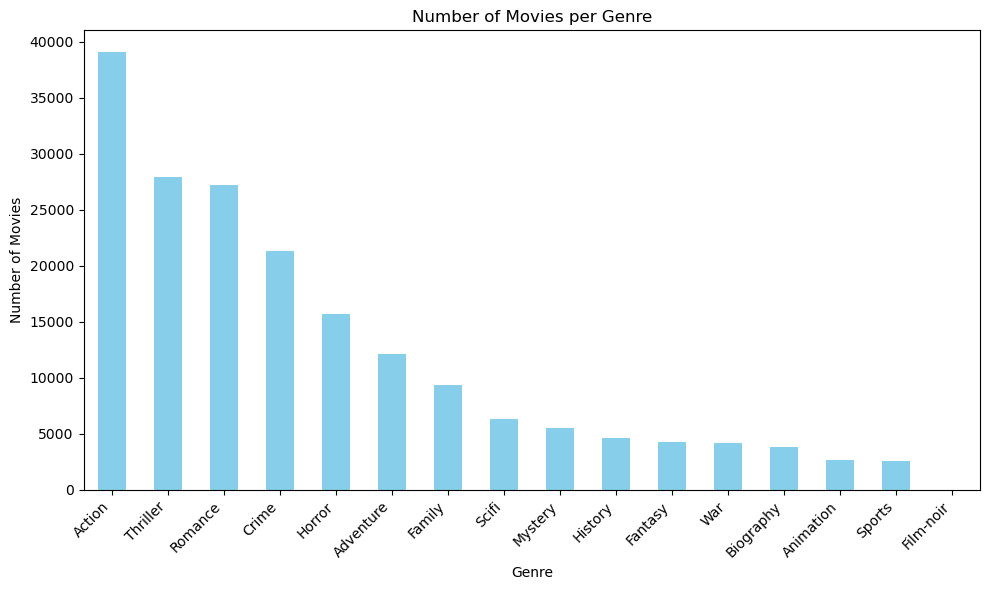

In [17]:
import matplotlib.pyplot as plt

genre_counts = movies_df_new['Genre'].value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

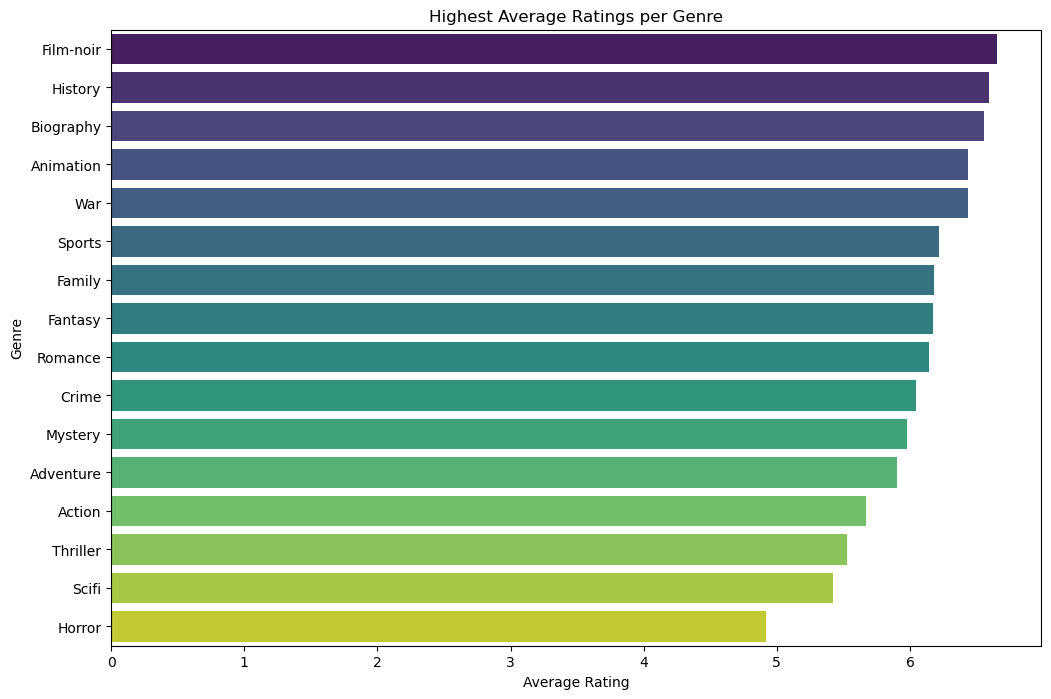

In [26]:
highest_avg_ratings = movies_df_new.groupby('Genre')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=highest_avg_ratings.values, y=highest_avg_ratings.index, palette='viridis')
plt.title('Highest Average Ratings per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

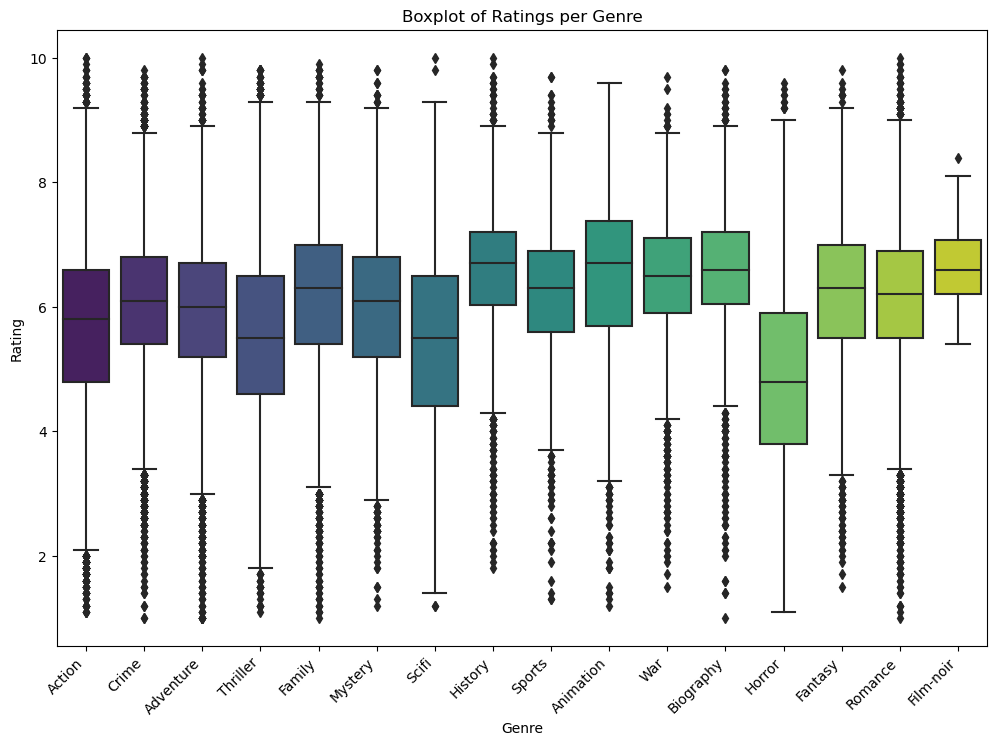

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='rating', data=movies_df_new, palette='viridis')
plt.title('Boxplot of Ratings per Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

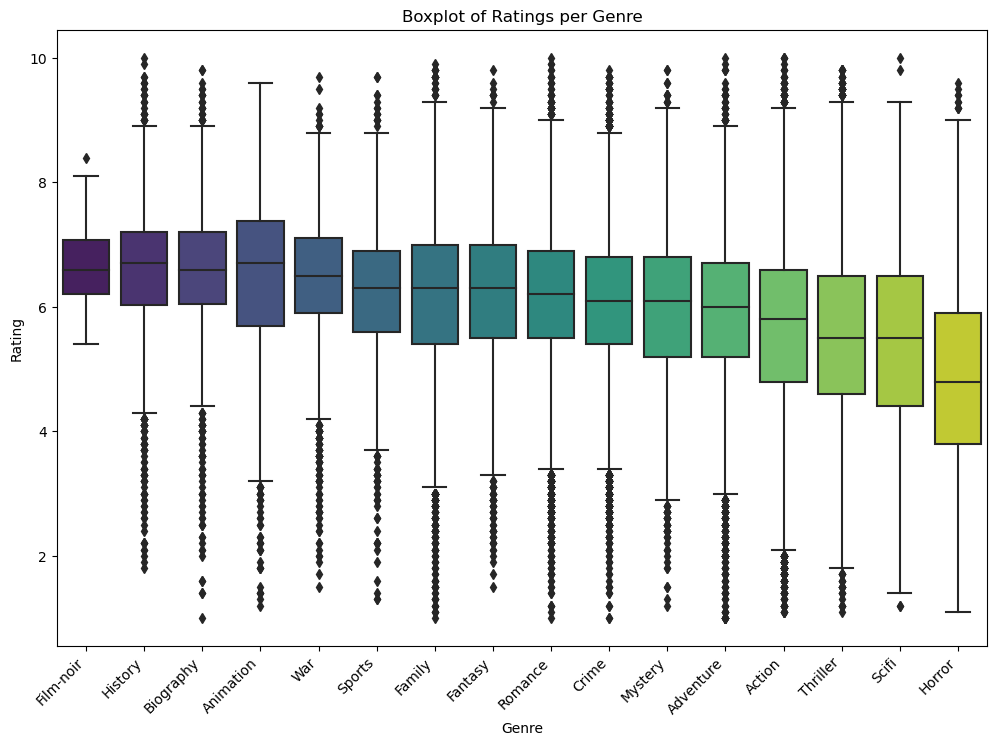

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average ratings per genre
avg_ratings = movies_df_new.groupby('Genre')['rating'].mean().sort_values(ascending=False).index

# Create a boxplot with the specified order
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='rating', data=movies_df_new, order=avg_ratings, palette='viridis')
plt.title('Boxplot of Ratings per Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


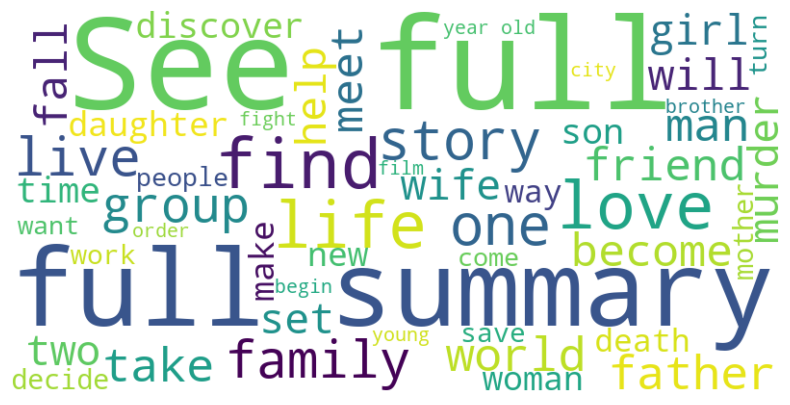

In [42]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(movies_df_new['description'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(text_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
%config NotebookApp.iopub_data_rate_limit=2000000.0


In [44]:
# filename = "movies_clean_1.csv"  

# genres = []
# descriptions = []

# with open(filename, 'r') as csv_file:
#     csv_reader = csv.reader(csv_file)
    
#     next(csv_reader)

    
#     for row in csv_reader:
#         genre, description = row[4], row[6]
#         genres.append(genre)
#         descriptions.append(description)

# print("genres:", genres)
# print("descriptions:", descriptions)

     

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [79]:
import csv

filename = "movies_clean_1.csv"
selected_genres = ['sci-fi', 'sports', 'romance', 'crime', 'horror']

genres = []
descriptions = []

with open(filename, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Assuming the first row contains headers, skipping it
    next(csv_reader)
    
    for row in csv_reader:
        genre, description = row[4], row[6]
        
        # Check if the genre is in the list of selected genres
        if genre.lower() in selected_genres:
            genres.append(genre)
            descriptions.append(description)

print("genres:", genres)
print("descriptions:", descriptions)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [133]:
vectorizer=CountVectorizer(input='content',
                        stop_words='english',
                        max_features=50)



## Now - let's use fit.transform to transform the list of files                                 
MyMat = vectorizer.fit_transform(descriptions)
print(type(MyMat))
## Get the column names
MyCols= vectorizer.get_feature_names_out()
print(MyCols)
## Create the dataframe...
df_voc = pd.DataFrame(MyMat.toarray(), columns=MyCols)
print(df_voc)


<class 'scipy.sparse._csr.csr_matrix'>
['add' 'city' 'couple' 'daughter' 'day' 'death' 'falls' 'family' 'father'
 'film' 'finds' 'friend' 'friends' 'gets' 'girl' 'goes' 'group' 'help'
 'home' 'house' 'husband' 'killer' 'life' 'lives' 'love' 'man' 'meets'
 'mother' 'murder' 'mysterious' 'new' 'night' 'old' 'people' 'plot'
 'police' 'school' 'small' 'son' 'story' 'summary' 'takes' 'time' 'town'
 'wife' 'woman' 'world' 'year' 'years' 'young']
        add  city  couple  daughter  day  death  falls  family  father  film  \
0         0     0       0         0    0      0      0       0       0     0   
1         0     0       0         0    0      0      0       0       0     0   
2         0     0       0         0    0      0      0       0       0     0   
3         0     0       0         0    0      0      0       0       0     0   
4         0     1       0         0    0      0      0       1       0     0   
...     ...   ...     ...       ...  ...    ...    ...     ...     ...   ...

In [135]:
import pandas as pd
from nltk.stem import PorterStemmer


porter = PorterStemmer()

# Function to check if a word is a logical number
def Logical_Numbers_Present(anyString):
    return any(char.isdigit() for char in anyString)

# Function to stem a word using Porter Stemmer
def stem_word(word):
    return porter.stem(word)

# Create a new DataFrame to store the filtered columns
df_vector = df_voc.copy()

# Iterate through the columns
for nextcol in df_voc.columns:
    # Check if the column contains logical numbers
    log_result = Logical_Numbers_Present(nextcol)

    # Stem the column name
    stemmed_col = stem_word(nextcol)

    # Check conditions and filter columns
    if log_result or len(stemmed_col) <= 3:
        df_vector = df_vector.drop([nextcol], axis=1)

print(df_vector)


        city  couple  daughter  death  falls  family  father  film  finds  \
0          0       0         0      0      0       0       0     0      0   
1          0       0         0      0      0       0       0     0      0   
2          0       0         0      0      0       0       0     0      0   
3          0       0         0      0      0       0       0     0      0   
4          1       0         0      0      0       1       0     0      0   
...      ...     ...       ...    ...    ...     ...     ...   ...    ...   
104521     0       0         0      1      0       0       0     0      0   
104522     0       0         0      0      0       0       0     0      0   
104523     0       0         0      0      0       0       0     0      0   
104524     0       0         0      0      0       0       0     0      0   
104525     0       0         0      0      0       0       0     0      0   

        friend  ...  summary  takes  time  town  wife  woman  world  year  

In [136]:
df_vector.head()

,city,couple,daughter,death,falls,family,father,film,finds,friend,...,summary,takes,time,town,wife,woman,world,year,years,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df_genres = df_vector


In [138]:
df_genres.head()

,city,couple,daughter,death,falls,family,father,film,finds,friend,...,summary,takes,time,town,wife,woman,world,year,years,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df_genres.insert(loc=0, column='LABEL', value=genres)


# MNB

In [140]:
from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
Train, Test = train_test_split(df_genres, test_size=0.3)
print(Train)
print(Test)

         LABEL  city  couple  daughter  death  falls  family  father  film  \
44063   horror     0       0         0      0      0       0       0     0   
5271     crime     0       0         0      0      0       0       0     0   
21662    crime     0       0         0      0      0       0       0     0   
32619   horror     0       0         0      0      0       0       0     0   
93939   sci-fi     0       0         0      0      0       0       0     0   
...        ...   ...     ...       ...    ...    ...     ...     ...   ...   
66868  romance     0       0         0      0      0       0       0     0   
46078   horror     0       0         0      0      0       0       0     0   
52050  romance     0       0         0      0      0       0       0     0   
8025     crime     0       0         0      0      0       0       1     0   
87591  romance     0       0         0      0      0       0       2     0   

       finds  ...  summary  takes  time  town  wife  woman  wor

In [141]:
TestLabels=Test["LABEL"]
print(TestLabels)

## remove labels
Test = Test.drop(["LABEL"], axis=1) #remove the entire column

27041      crime
28920     horror
62567    romance
97223     sci-fi
48870     horror
          ...   
26141      crime
57913    romance
70629    romance
61760    romance
3739       crime
Name: LABEL, Length: 31358, dtype: object


In [142]:
## TRAIN ----------------------------
Trainlabels=Train["LABEL"]

print(Trainlabels)
## remove labels
Train = Train.drop(["LABEL"], axis=1)

44063     horror
5271       crime
21662      crime
32619     horror
93939     sci-fi
          ...   
66868    romance
46078     horror
52050    romance
8025       crime
87591    romance
Name: LABEL, Length: 73168, dtype: object


In [143]:
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler
MyModelNB= MultinomialNB()

 

NB1=MyModelNB.fit(Train, Trainlabels)
Prediction = MyModelNB.predict(Test)
print(Prediction)
print(np.round(MyModelNB.predict_proba(Test),2))
MyModelNB.get_params(deep=True)


['romance' 'romance' 'romance' ... 'romance' 'romance' 'horror']
[[0.22 0.23 0.39 0.12 0.04]
 [0.32 0.11 0.38 0.14 0.05]
 [0.03 0.02 0.94 0.01 0.  ]
 ...
 [0.27 0.2  0.38 0.11 0.04]
 [0.11 0.06 0.79 0.02 0.02]
 [0.22 0.35 0.3  0.1  0.03]]


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [64]:
print(accuracy_score(TestLabels, Prediction))

0.3102310231023102


# Decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz



In [145]:
MyDT = DecisionTreeClassifier(criterion='entropy',
                              splitter='best',
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0,
                              max_features=None,
                              random_state=None,
                              max_leaf_nodes=None,
                              min_impurity_decrease=0.0,
                              class_weight=None)


In [146]:
TrainDF1, TestDF1 = train_test_split(df_genres, test_size=0.3)


In [147]:
Test1Labels=TestDF1["LABEL"]
TestDF1 = TestDF1.drop(["LABEL"], axis=1)


In [148]:
Train1Labels=TrainDF1["LABEL"]
TrainDF1 = TrainDF1.drop(["LABEL"], axis=1)


In [149]:
NB1=MyModelNB.fit(TrainDF1, Train1Labels)
Prediction1 = MyModelNB.predict(TestDF1)
print(np.round(MyModelNB.predict_proba(TestDF1),2))

[[0.17 0.09 0.67 0.05 0.02]
 [0.26 0.22 0.39 0.1  0.04]
 [0.2  0.34 0.32 0.11 0.03]
 ...
 [0.22 0.3  0.27 0.19 0.01]
 [0.17 0.39 0.28 0.12 0.03]
 [0.72 0.11 0.12 0.04 0.01]]


In [150]:
print("\nThe prediction from NB is:")
print(Prediction1)
print("\nThe actual labels are:")
print(Test1Labels)


The prediction from NB is:
['romance' 'romance' 'horror' ... 'horror' 'horror' 'crime']

The actual labels are:
31670     horror
3108       crime
88676    romance
63261    romance
22718      crime
          ...   
74727    romance
59356    romance
9328       crime
13839      crime
4386       crime
Name: LABEL, Length: 31358, dtype: object


In [151]:
cnf_matrix1 = confusion_matrix(Test1Labels, Prediction1)
print("\nThe confusion matrix is:")
print(cnf_matrix1)


The confusion matrix is:
[[ 1491  1049  5547   176     2]
 [  506  2080  3938   235     4]
 [  554  1075 10313   288    10]
 [  167   511  1975   293     1]
 [   41    90   947    60     5]]


In [152]:
MyDT.fit(TrainDF1, Train1Labels)
# Evaluate the model on the test set
accuracy = MyDT.score(TestDF1, Test1Labels)
print("Decision Tree Accuracy:", accuracy)
MyDT.predict(TestDF1)
print("Predictions:", predictions)


Decision Tree Accuracy: 0.42247592320938837
Predictions: ['romance' 'horror' 'crime' ... 'romance' 'sci-fi' 'crime']


[Text(0.9014051353424536, 0.99, 'X[20] <= 0.5\nentropy = 2.013\nsamples = 73168\nvalue = [19052, 15932, 28485, 7053, 2646]'),
 Text(0.8077748253224315, 0.97, 'X[28] <= 0.5\nentropy = 2.055\nsamples = 66171\nvalue = [18425, 15579, 22722, 6890, 2555]'),
 Text(0.7674305818584286, 0.95, 'X[23] <= 0.5\nentropy = 2.06\nsamples = 64137\nvalue = [16999, 15325, 22453, 6814, 2546]'),
 Text(0.7299083755217253, 0.93, 'X[17] <= 0.5\nentropy = 2.063\nsamples = 62205\nvalue = [15841, 14895, 22186, 6751, 2532]'),
 Text(0.6967822064507543, 0.91, 'X[27] <= 0.5\nentropy = 2.062\nsamples = 60839\nvalue = [15358, 14166, 22113, 6673, 2529]'),
 Text(0.661550201738406, 0.89, 'X[38] <= 0.5\nentropy = 2.064\nsamples = 52271\nvalue = [12722, 12896, 18555, 6177, 1921]'),
 Text(0.6076709344011407, 0.87, 'X[15] <= 0.5\nentropy = 2.047\nsamples = 49730\nvalue = [12297, 12352, 17905, 5432, 1744]'),
 Text(0.5612798666481797, 0.85, 'X[12] <= 0.5\nentropy = 2.05\nsamples = 48206\nvalue = [12061, 11517, 17525, 5366, 1737

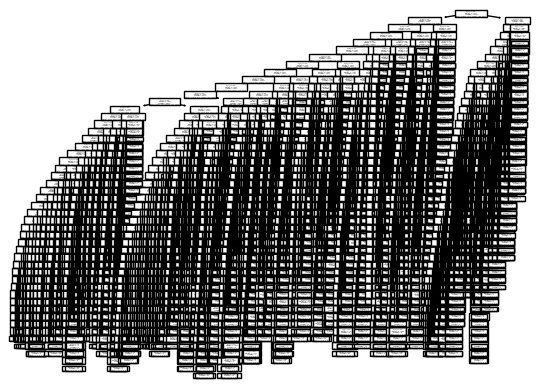

In [155]:
tree.plot_tree(MyDT)


Class Labels: ['romance' 'crime' 'sci-fi' 'sports' 'horror']


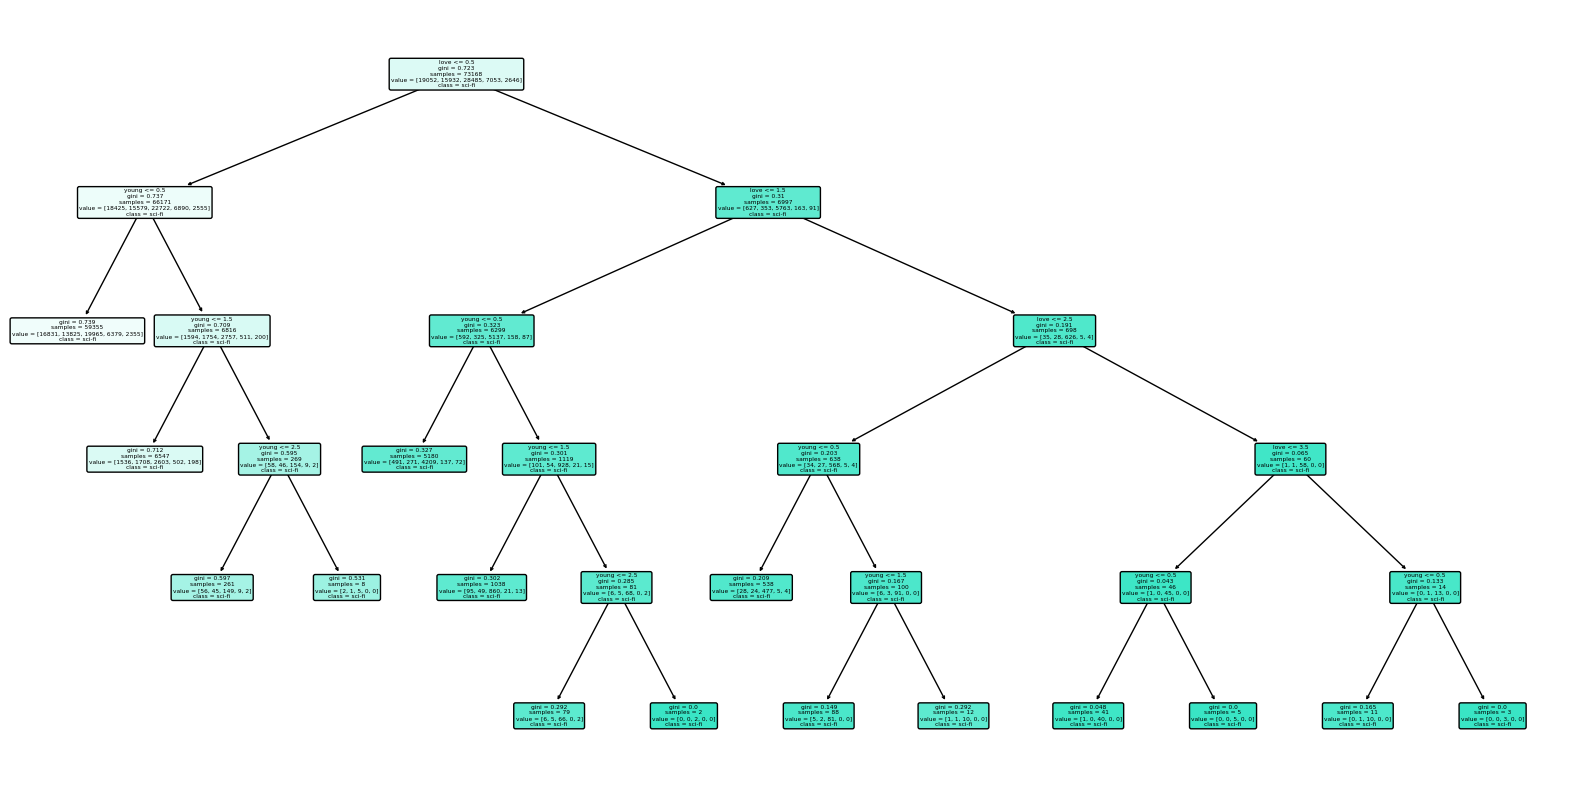

In [158]:
# Get feature importances
feature_importances = MyDT.feature_importances_

# Get indices of top 20 features
top_20_indices = np.argsort(feature_importances)[-2:]

# Get the corresponding feature names
top_20_feature_names = TrainDF1.columns[top_20_indices]

# Subset the DataFrame with only the top 20 features
TrainDF1_top20 = TrainDF1[top_20_feature_names]

# Train the Decision Tree model with only the top 20 features
MyDT_top20 = DecisionTreeClassifier()
MyDT_top20.fit(TrainDF1_top20, Train1Labels)

# Plot the tree for the model with the top 20 features
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Provide all the class labels
class_labels = pd.unique(Train1Labels)

print("Class Labels:", class_labels)

plt.figure(figsize=(20, 10))
plot_tree(MyDT_top20, filled=True, feature_names=top_20_feature_names, class_names=class_labels, rounded=True)
plt.show()


# elbow code 

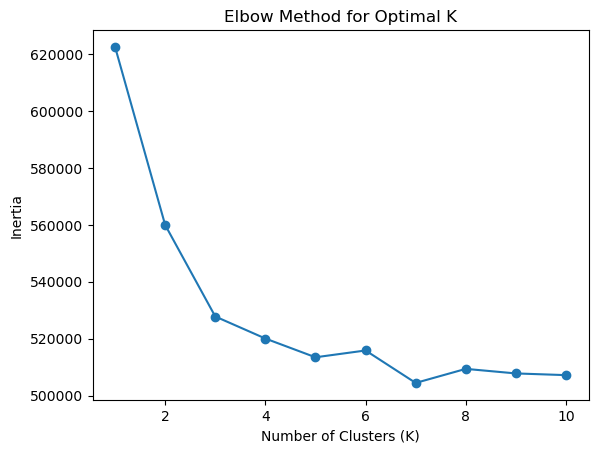

In [159]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

X = df_vector1

inertia = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [128]:
print(df_vector)

from sklearn.metrics import silhouette_samples, silhouette_score
#from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

df_vector1 = df_vector.drop('LABEL', axis=1)

# Instantiate and fit the KMeans model
My_KMean = KMeans(n_clusters=3, random_state=42)
My_KMean.fit(df_vector1)

# Predict clusters
My_labels = My_KMean.predict(df_vector1)
print(My_labels)

My_KMean= KMeans(n_clusters=3)
My_KMean.fit(df_vector1)
My_labels=My_KMean.predict(df_vector1)
print(My_labels)

from sklearn import preprocessing
#from sklearn.cluster import KMeans
#import seaborn as sns

My_KMean2 = KMeans(n_clusters=4).fit(preprocessing.normalize(df_vector1))
My_KMean2.fit(df_vector1)
My_labels2=My_KMean2.predict(df_vector1)
print(My_labels2)

My_KMean3= KMeans(n_clusters=3)
My_KMean3.fit(df_vector1)
My_labels3=My_KMean3.predict(df_vector1)
print("Silhouette Score for k = 3 \n",silhouette_score(df_vector1, My_labels3))



         LABEL  abandoned  accident  accidentally  accused  action  actress  \
0        crime          0         0             0        0       0        0   
1        crime          0         1             0        0       0        0   
2        crime          0         0             0        0       0        0   
3        crime          0         0             0        0       0        0   
4        crime          0         0             0        0       0        0   
...        ...        ...       ...           ...      ...     ...      ...   
104521  sports          0         0             0        0       0        0   
104522  sports          0         0             0        0       0        0   
104523  sports          0         0             0        0       0        0   
104524  sports          0         0             0        0       0        0   
104525  sports          0         0             0        0       1        0   

        adventure  affair  agent  ...  works  world

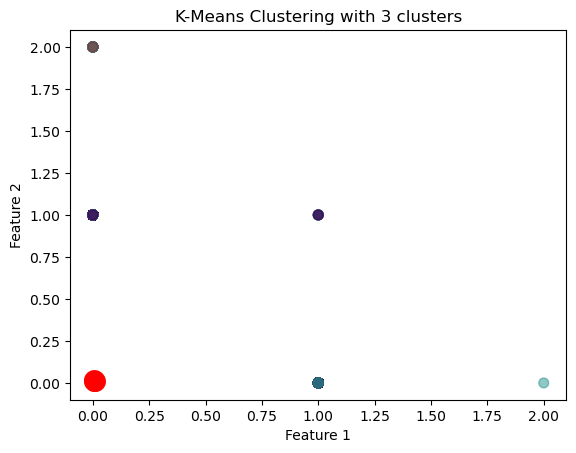

In [160]:
plt.scatter(df_vector1.iloc[:, 0], df_vector1.iloc[:, 1], c=My_labels, cmap='viridis', s=50, alpha=0.5)
centers = My_KMean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9)
plt.title('K-Means Clustering with 3 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

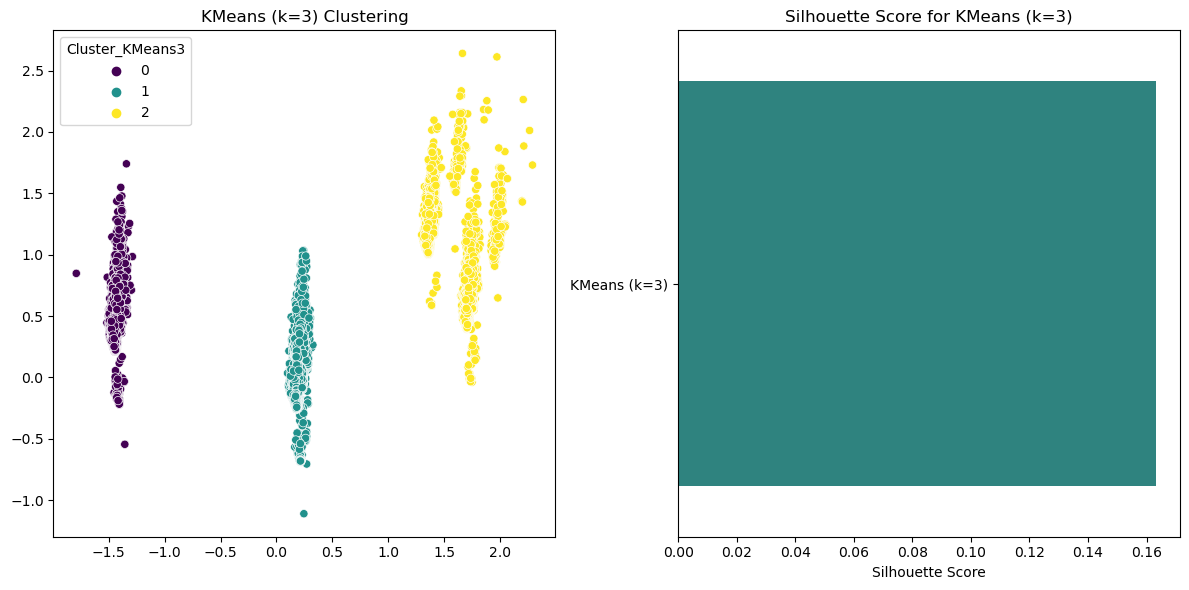

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Add the cluster labels to the original DataFrame
df_vector['Cluster_KMeans3'] = My_labels3

# Perform PCA for dimensionality reduction to plot in 2D
pca = PCA(n_components=2)
df_vector_pca = pca.fit_transform(df_vector1)

# Plot the data points with color-coded clusters
plt.figure(figsize=(12, 6))

# Plot the KMeans (k=3) clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_vector_pca[:, 0], y=df_vector_pca[:, 1], hue=df_vector['Cluster_KMeans3'], palette='viridis', legend='full')
plt.title('KMeans (k=3) Clustering')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
sns.barplot(x=[silhouette_score(df_vector1, My_labels3)], y=['KMeans (k=3)'], palette='viridis')
plt.xlabel('Silhouette Score')
plt.title('Silhouette Score for KMeans (k=3)')

plt.tight_layout()
plt.show()


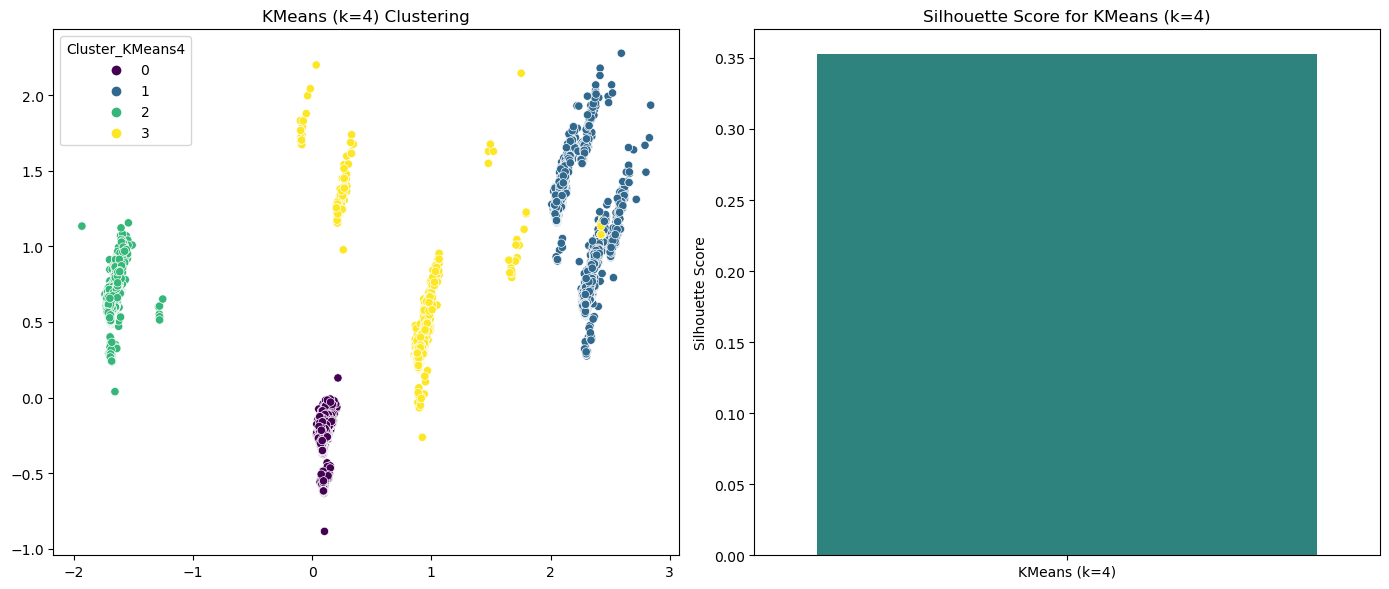

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(df_vector1)
my_labels4 = kmeans4.predict(df_vector1)

df_vector['Cluster_KMeans4'] = my_labels4

# Perform PCA for dimensionality reduction to plot in 2D
pca = PCA(n_components=2)
df_vector_pca = pca.fit_transform(df_vector1)

# Plot the data points with color-coded clusters
plt.figure(figsize=(14, 6))

# Plot the KMeans (k=4) clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_vector_pca[:, 0], y=df_vector_pca[:, 1], hue=df_vector['Cluster_KMeans4'], palette='viridis', legend='full')
plt.title('KMeans (k=4) Clustering')

# Calculate the silhouette score for k=4 and plot
silhouette_avg4 = silhouette_score(df_vector1, my_labels4)
plt.subplot(1, 2, 2)
sns.barplot(x=['KMeans (k=4)'], y=[silhouette_avg4], palette='viridis')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans (k=4)')

plt.tight_layout()
plt.show()


Silhouette Score for k = 4: 0.16775119439766065


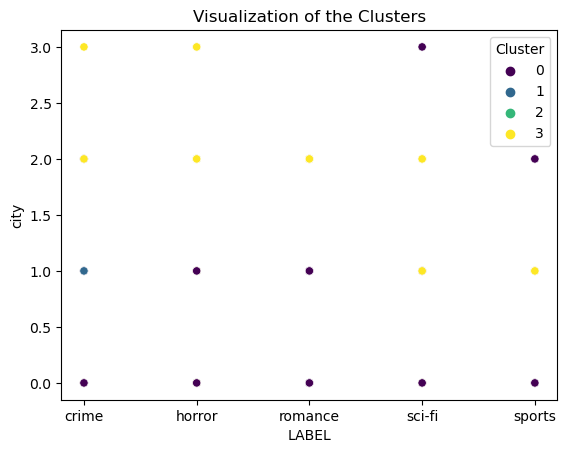

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df_vector1 = df_vector.drop('LABEL', axis=1)

scaler = StandardScaler()
df_vector_scaled = scaler.fit_transform(df_vector1)

# Instantiate and fit the KMeans model for 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_vector_scaled)

# Predict clusters
cluster_labels = kmeans.predict(df_vector_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(df_vector_scaled, cluster_labels)
print(f"Silhouette Score for k = 4: {silhouette_avg}")

df_vector['Cluster'] = cluster_labels

sns.scatterplot(x=df_vector.iloc[:,0], y=df_vector.iloc[:,1], hue=df_vector['Cluster'], palette='viridis')
plt.title('Visualization of the Clusters')
plt.show()


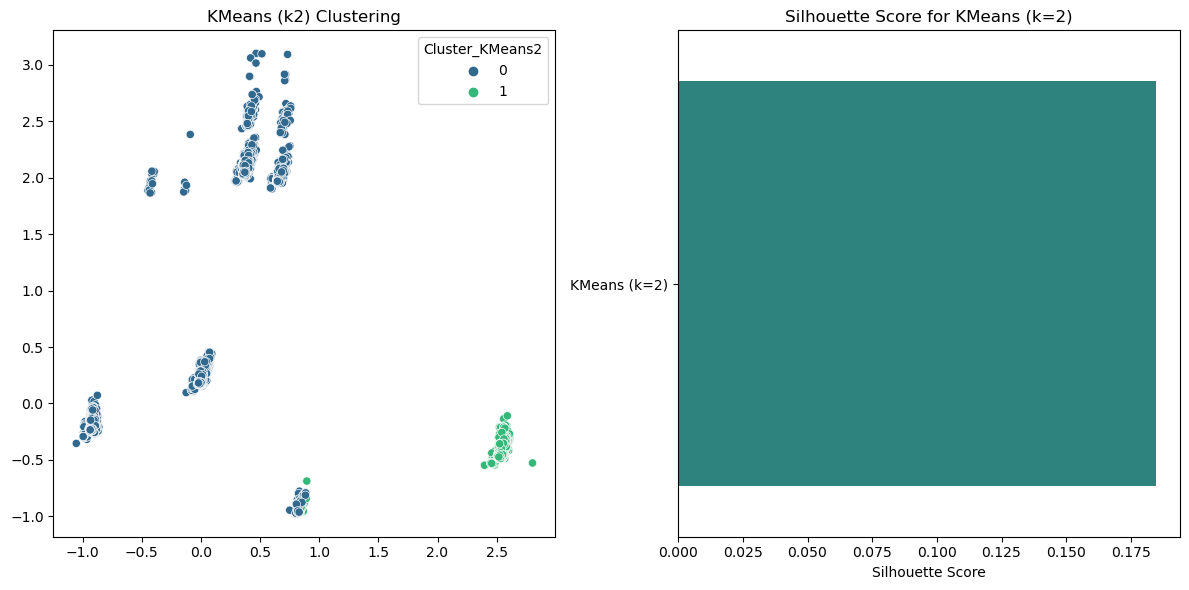

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


My_KMean4 = KMeans(n_clusters=4, random_state=42)
My_KMean4.fit(df_vector1)

My_KMean2 = KMeans(n_clusters=2).fit(preprocessing.normalize(df_vector1))
My_KMean2.fit(df_vector1)
My_labels2=My_KMean2.predict(df_vector1)

My_labels2 = My_KMean2.predict(df_vector1)



df_vector['Cluster_KMeans2'] = My_labels2

pca = PCA(n_components=2)
df_vector_pca = pca.fit_transform(df_vector1)

# Plot the data points with color-coded clusters
plt.figure(figsize=(12, 6))

# Plot the KMeans (k=4) clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_vector_pca[:, 0], y=df_vector_pca[:, 1], hue=df_vector['Cluster_KMeans2'], palette='viridis', legend='full')
plt.title('KMeans (k2) Clustering')

# Plot the silhouette scores for the new clustering
silhouette_avg4 = silhouette_score(df_vector1, My_labels4)
plt.subplot(1, 2, 2)
sns.barplot(x=[silhouette_avg4], y=['KMeans (k=2)'], palette='viridis')
plt.xlabel('Silhouette Score')
plt.title('Silhouette Score for KMeans (k=2)')

plt.tight_layout()
plt.show()


# LDA 

In [184]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

MyVectLDA_DH=CountVectorizer(input='content', stop_words= "english")

Vect_DH = MyVectLDA_DH.fit_transform(df_vector1)
ColumnNamesLDA_DH=MyVectLDA_DH.get_feature_names()
CorpusDF_DH=pd.DataFrame(Vect_DH.toarray(),columns=ColumnNamesLDA_DH)
print(CorpusDF_DH)


lda_model_DH = LatentDirichletAllocation(n_components=5, max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(Vect_DH)

print("SIZE: ", LDA_DH_Model.shape)  # (NO_DOCUMENTS, NO_TOPICS)

# Let's see how the first document in the corpus looks like in
## different topic spaces
print(LDA_DH_Model[0])
print(LDA_DH_Model[6])
print("List of prob: ")
print(LDA_DH_Model)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


     abandoned  accident  accidentally  accused  action  actress  adventure  \
0            1         0             0        0       0        0          0   
1            0         1             0        0       0        0          0   
2            0         0             1        0       0        0          0   
3            0         0             0        1       0        0          0   
4            0         0             0        0       1        0          0   
..         ...       ...           ...      ...     ...      ...        ...   
446          0         0             0        0       0        0          0   
447          0         0             0        0       0        0          0   
448          0         0             0        0       0        0          0   
449          0         0             0        0       0        0          0   
450          0         0             0        0       0        0          0   

     affair  agent  alien  ...  works  world  write

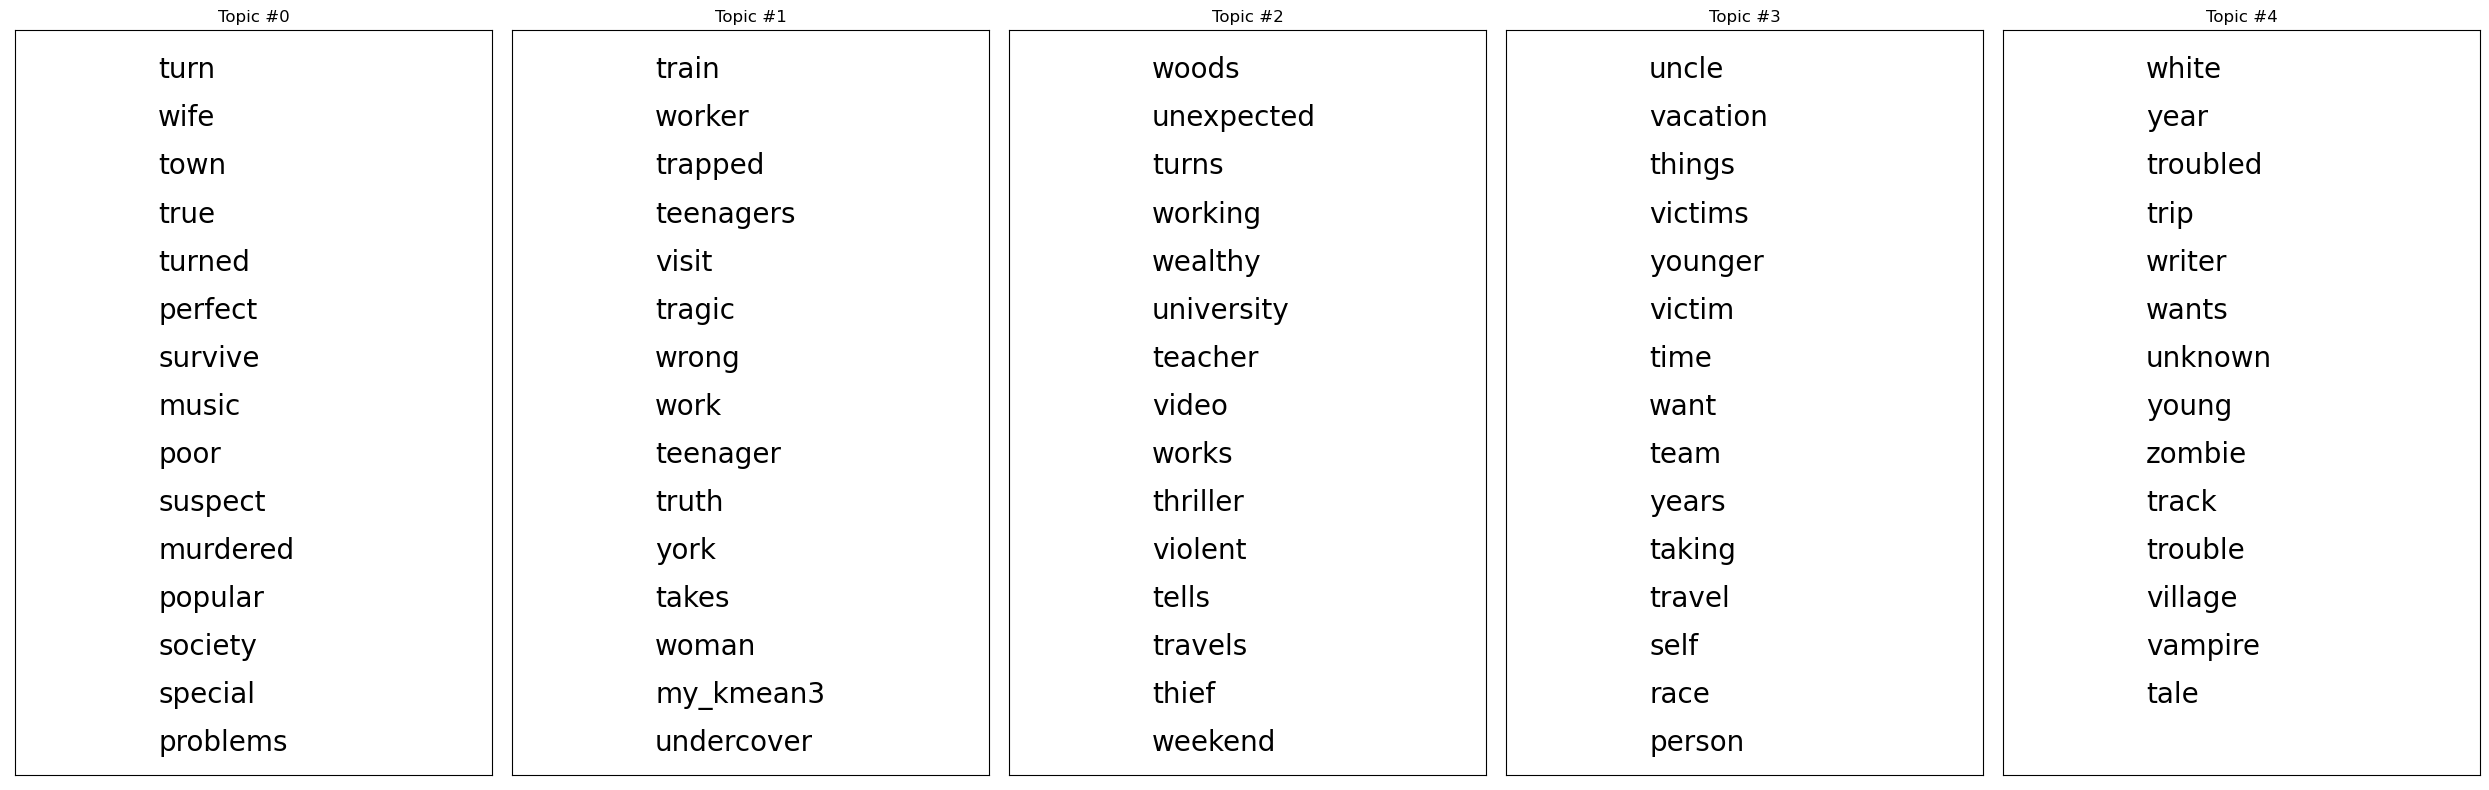

In [216]:

exclude_word = 'cluster_kmeans3'  

plt.figure(figsize=(num_topics * 5, 8))

for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)
    plt.ylim(0, num_top_words + 0.5)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]

    word_count = 0
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        if word != exclude_word:  # Only plot the word if it is not the excluded word
            plt.text(0.3, num_top_words-word_count-0.5, word, fontsize=fontsize_base)
            word_count += 1
        if word_count >= num_top_words:
            break

plt.tight_layout()
plt.show()


In [204]:
#conda install -c conda-forge pyldavis
#!pip install pyLDAvis
import pyLDAvis
from gensim.models import LdaModel


pyLDAvis.enable_notebook()
panel = gensimvis.prepare(LDA_DH_Model, Vect_DH, vectorizer, mds='tsne')
pyLDAvis.display(panel)




################ Another fun vis for LDA

word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(ColumnNamesLDA_DH)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 40

for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([])  # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
        

#plt.tight_layout()
#plt.show()
plt.savefig("TopicsVis.pdf")

AttributeError: 'CountVectorizer' object has no attribute 'token2id'